# FCR-D Analysis of Price and volumes

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import requests
import os
import seaborn as sns


In [2]:

desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop') 
This_file_path = os.getcwd()
total_string_len = len(This_file_path)
string_len_to_remove = len("Data Examination")
path = This_file_path[0:(total_string_len-string_len_to_remove)]
path_processed_data = path + "Processed_data\\"

## Load CSV file
If API has already been runned, load the csv instead. 1 second versus 2 minutes ;-) 

In [3]:
data = pd.read_csv(path_processed_data + 'real.csv') # Change path
data = data.drop(columns=["Hour"])
print(data.columns)

Index(['Spot', 'FD1_down', 'FD2_down', 'FD1_up', 'FD2_up', 'FD1_up_percentage',
       'FD2_up_percentage', 'FD1_down_percentage', 'FD2_down_percentage',
       'FD_act_up', 'FD_act_down'],
      dtype='object')


# Correlation Analysis

In [4]:
labels = [
    r'$λ^{DA}_{t}$',
    r'$λ^{FD1↓}_t$',
    r'$λ^{FD2↓}_t$',
    r'$λ^{FD1↑}_t$',
    r'$λ^{FD2↑}_t$',
    r'$y^{FD1↑}_t$',
    r'$y^{FD2↑}_t$',
    r'$y^{FD1↑}_t$',
    r'$y^{FD2↑}_t$',
    r'$a^{FD↑}_t$',
    r'$a^{FD↓}_t$'
]

['Spot', 'FD1_down', 'FD2_down', 'FD1_up', 'FD2_up']


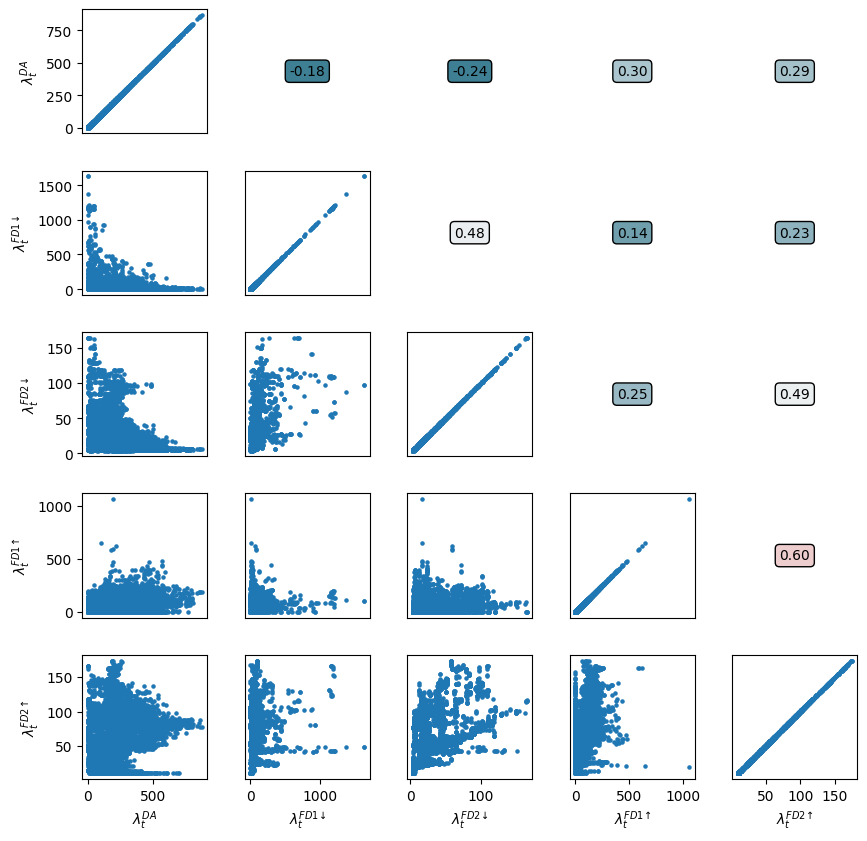

In [41]:
import seaborn as sns

df = data

# Create a correlation matrix
corr_data = df[['Spot', 'FD1_down', 'FD2_down', 'FD1_up', 'FD2_up']].corr()
# Create a list of column names for the variables in the correlation matrix
cols = corr_data.columns.tolist()
print(cols)

# Create a correlation matrix
corr = corr_data

# Define color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
M = len(cols)  # Number of features

# Create a grid of subplots
fig, ax = plt.subplots(nrows=M, ncols=M, figsize=(10, 10))

# Loop through the rows and columns of the grid
for i in range(M):  # through the rows
    for j in range(M):  # through the columns

        # Plot scatter plot in lower triangle
        if i >= j:
            ax[i, j].scatter(df.iloc[:, j], df.iloc[:, i], s=5)

        # Plot correlation value in upper triangle
        elif i < j:
            corr_val = corr.iloc[i, j]
            ax[i, j].text(0.5, 0.5, f"{corr_val:.2f}",
                          ha='center', va='center',
                          transform=ax[i, j].transAxes,
                          bbox=dict(facecolor=cmap(corr_val), edgecolor='black', boxstyle='round'))
            ax[i, j].axis('off')

        if i != M - 1:  # if row is different from the last one change the x axis
            ax[i, j].xaxis.set_visible(False)
        if j != 0:  # if column is different from 0 then change the y axis
            ax[i, j].yaxis.set_visible(False)

        # Set only the axis's for the outer axis
        ax[-1, j].set_xlabel(labels[j], rotation=0)
        ax[i, 0].set_ylabel(labels[i], rotation=90)

# Adjust the layout of the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)


# Show the plot
plt.savefig('Correlation_price_parameters.png', format="png", bbox_inches="tight")
plt.show()


['Spot', 'FD1_down', 'FD2_down', 'FD1_up', 'FD2_up', 'FD1_up_percentage', 'FD2_up_percentage', 'FD1_down_percentage', 'FD2_down_percentage', 'FD_act_up', 'FD_act_down']


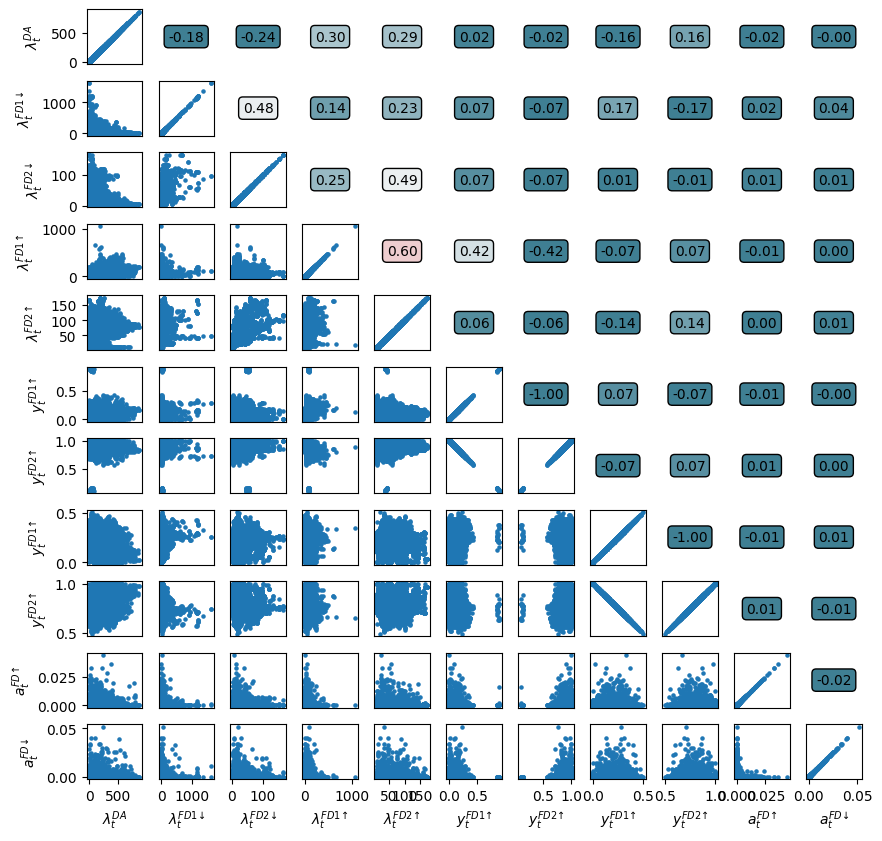

In [42]:
import seaborn as sns

df = data

# Create a correlation matrix
corr_data = df.corr(method ='pearson')
# Create a list of column names for the variables in the correlation matrix
cols = corr_data.columns.tolist()
print(cols)

# Create a correlation matrix
corr = corr_data

# Define color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
M = len(cols)  # Number of features

# Create a grid of subplots
fig, ax = plt.subplots(nrows=M, ncols=M, figsize=(10, 10))

# Loop through the rows and columns of the grid
for i in range(M):  # through the rows
    for j in range(M):  # through the columns

        # Plot scatter plot in lower triangle
        if i >= j:
            ax[i, j].scatter(df.iloc[:, j], df.iloc[:, i], s=5)

        # Plot correlation value in upper triangle
        elif i < j:
            corr_val = corr.iloc[i, j]
            ax[i, j].text(0.5, 0.5, f"{corr_val:.2f}",
                          ha='center', va='center',
                          transform=ax[i, j].transAxes,
                          bbox=dict(facecolor=cmap(corr_val), edgecolor='black', boxstyle='round'))
            ax[i, j].axis('off')

        if i != M - 1:  # if row is different from the last one change the x axis
            ax[i, j].xaxis.set_visible(False)
        if j != 0:  # if column is different from 0 then change the y axis
            ax[i, j].yaxis.set_visible(False)

        # Set only the axis's for the outer axis
        ax[-1, j].set_xlabel(labels[j], rotation=0)
        ax[i, 0].set_ylabel(labels[i], rotation=90)

# Adjust the layout of the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)


# Show the plot
plt.savefig('Correlation_all_parameters.png', format="png", bbox_inches="tight")
plt.show()


# Descriptive analysis and Box plots

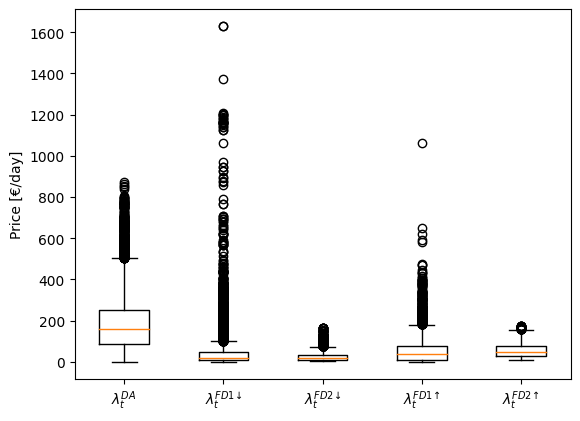

In [10]:

xlabels = [
    r'$λ^{DA}_{t}$',
    r'$λ^{FD1↓}_t$',
    r'$λ^{FD2↓}_t$',
    r'$λ^{FD1↑}_t$',
    r'$λ^{FD2↑}_t$',
    r'$y^{FD1↑}_t$',
    r'$y^{FD2↑}_t$',
    r'$y^{FD1↑}_t$',
    r'$y^{FD2↑}_t$',
    r'$a^{FD↑}_t$',
    r'$a^{FD↓}_t$'
]
x_labels = xlabels[0:5]
# Assuming you have a DataFrame named 'data'
plt.boxplot(data[["Spot", 'FD1_down', 'FD2_down', 'FD1_up', 'FD2_up']].values)
y_axis_label = 'Price [\u20AC/day]'
plt.ylabel(y_axis_label)
# Set x-axis tick positions and labels
x_positions = np.arange(1, len(x_labels) + 1)
#plt.ylim(-10,600)
plt.xticks(x_positions, x_labels, rotation='horizontal')
plt.savefig('Boxplot_prices.pdf', format="pdf", bbox_inches="tight")
plt.show()

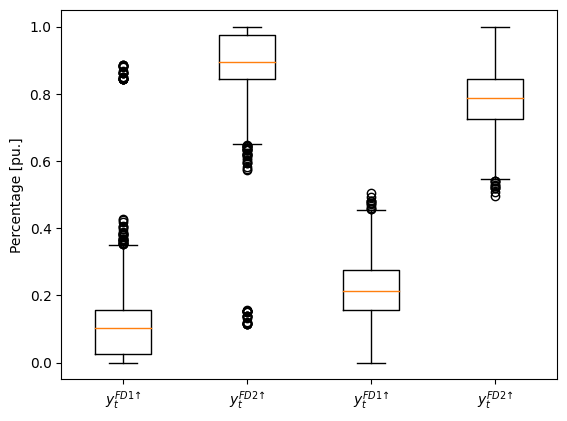

In [44]:
plt.boxplot(data[['FD1_up_percentage', 'FD2_up_percentage', 'FD1_down_percentage', 'FD2_down_percentage']].values)
x_labels = xlabels[5:9]
y_axis_label = 'Percentage [pu.]'
plt.ylabel(y_axis_label)
# Set x-axis tick positions and labels
x_positions = np.arange(1, len(x_labels) + 1)
plt.xticks(x_positions, x_labels, rotation='horizontal')
plt.savefig('Boxplot_acceptance.pdf', format="pdf", bbox_inches="tight")
plt.show()

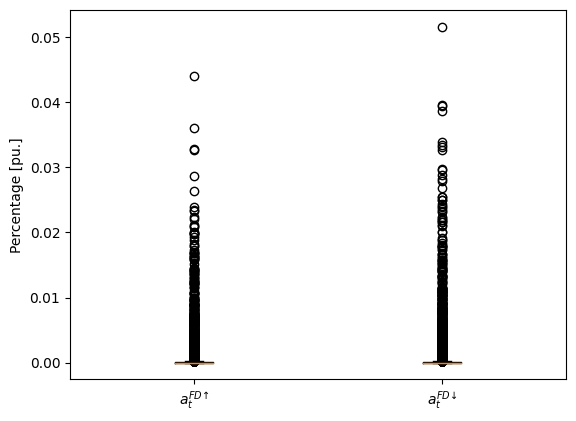

In [45]:
plt.boxplot(data[['FD_act_up', 'FD_act_down']].values)
x_labels = xlabels[9:11]
y_axis_label = 'Percentage [pu.]'
plt.ylabel(y_axis_label)
# Set x-axis tick positions and labels
x_positions = np.arange(1, len(x_labels) + 1)
plt.xticks(x_positions, x_labels, rotation='horizontal')
plt.savefig('Boxplot_activation.pdf', format="pdf", bbox_inches="tight")
plt.show()

# Stationarity

In [46]:

from statsmodels.tsa.stattools import kpss, adfuller

# Assuming your time series data is stored in the variable 'data'

# Perform KPSS test
kpss_stat, p_value, lags, critical_values = kpss(data["Spot"])
print("KPSS Statistic:", kpss_stat)
print("p-value:", p_value)
print("Lags:", lags)
print("Critical Values:", critical_values)

# Perform ADF test
result = adfuller(data["Spot"])
adf_stat = result[0]
p_value = result[1]
used_lags = result[2]
nobs = result[3]
critical_values = result[4]

print("ADF Statistic:", adf_stat)
print("p-value:", p_value)
print("Used Lags:", used_lags)
print("Number of Observations:", nobs)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")





C:\Users\Daniel  BV\AppData\Local\Temp\ipykernel_11480\3472829111.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(data["Spot"])


KPSS Statistic: 1.674991339556249
p-value: 0.01
Lags: 58
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF Statistic: -7.165839721115447
p-value: 2.888030682928637e-10
Used Lags: 27
Number of Observations: 10892
Critical Values:
1%: -3.430950517976557
5%: -2.861805395617258
10%: -2.5669112649555363


In [47]:
from statsmodels.tsa.stattools import adfuller

for parameter in data.columns:
    print(parameter)
    # Assuming your time series data is stored in the variable 'data'
    result = adfuller(data[parameter])

    # Extract the test statistic and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Compare the test statistic with critical values at 5% significance level
    critical_values = result[4]
    if test_statistic < critical_values['5%']:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

    print("p-value:", p_value)





Spot
The series is stationary.
p-value: 2.888030682928637e-10
FD1_down
The series is stationary.
p-value: 2.947847876323249e-16
FD2_down
The series is stationary.
p-value: 0.002610794971593696
FD1_up
The series is stationary.
p-value: 2.746660628346565e-13
FD2_up
The series is non-stationary.
p-value: 0.5296311780174554
FD1_up_percentage
The series is stationary.
p-value: 1.3087631035225427e-20
FD2_up_percentage
The series is stationary.
p-value: 1.3087631035216863e-20
FD1_down_percentage
The series is stationary.
p-value: 9.459739949277084e-12
FD2_down_percentage
The series is stationary.
p-value: 9.459739949211662e-12
FD_act_up
The series is stationary.
p-value: 0.0
FD_act_down
The series is stationary.
p-value: 9.599166902722174e-30


In [48]:
import pandas as pd

# Assuming your DataFrame is named 'df' and you want to calculate the rolling mean with a window size of 10
rolling_mean = data.rolling(window=24).mean()

# Print the DataFrame with the rolling mean
#print(rolling_mean)


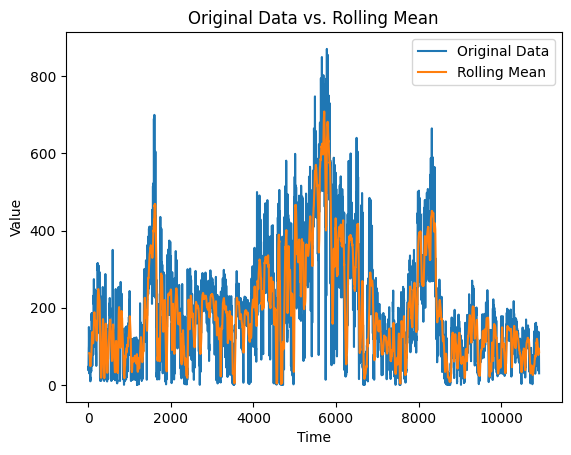

In [49]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'rolling_mean' is the calculated rolling mean
plt.plot(data["Spot"], label='Original Data')
plt.plot(rolling_mean["Spot"], label='Rolling Mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Original Data vs. Rolling Mean')
plt.show()




Check autocorrelation as well:

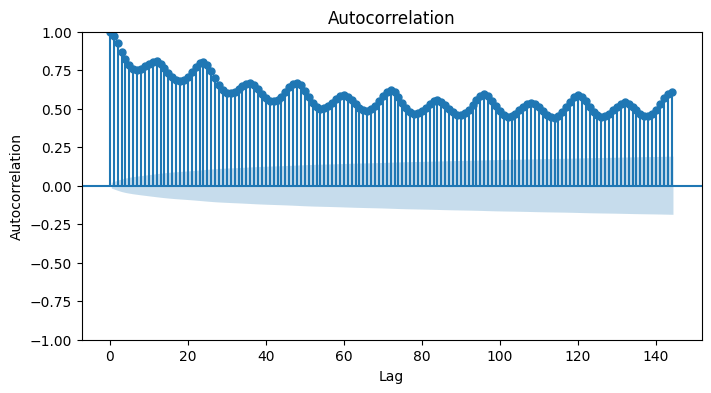

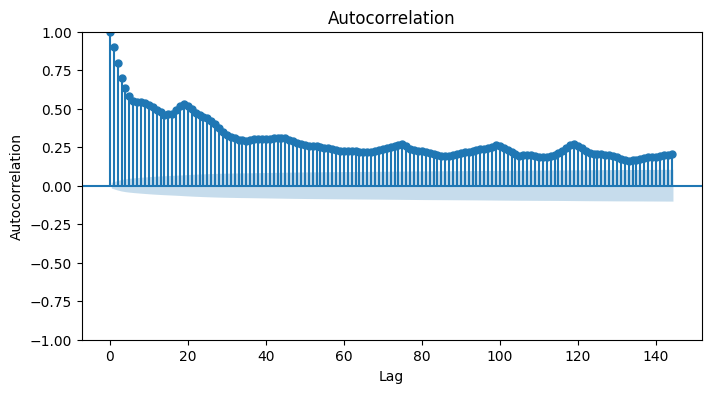

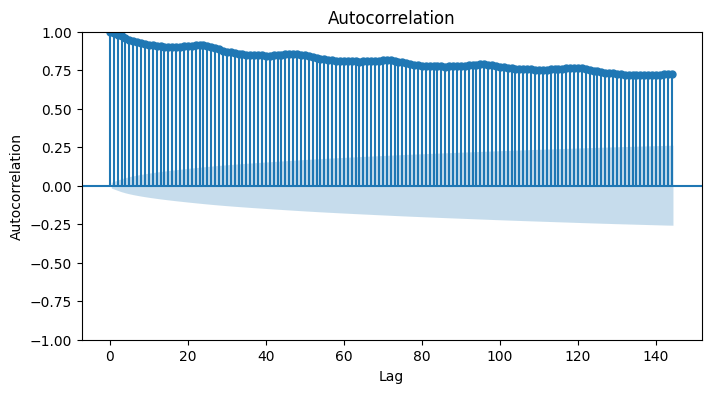

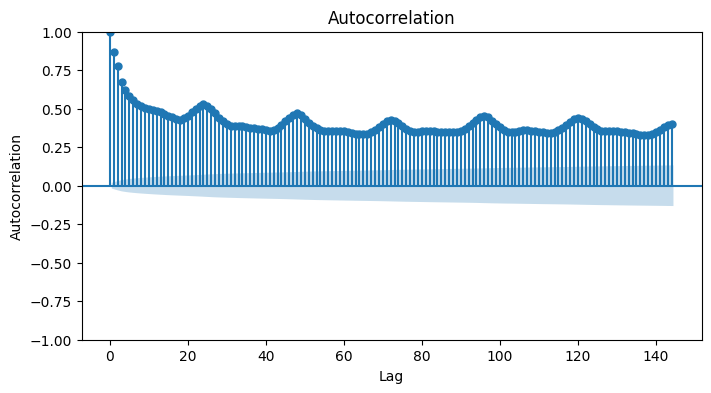

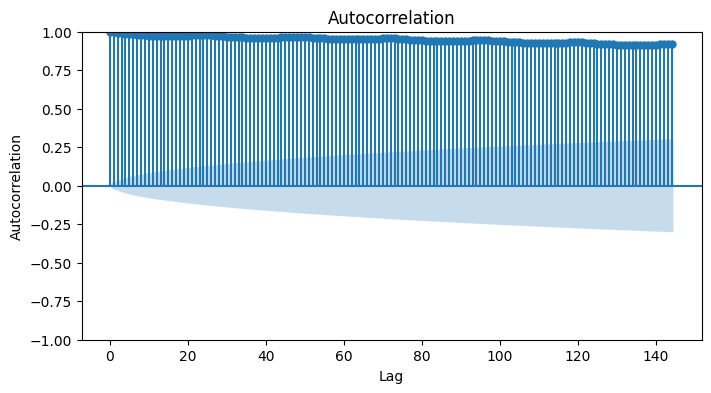

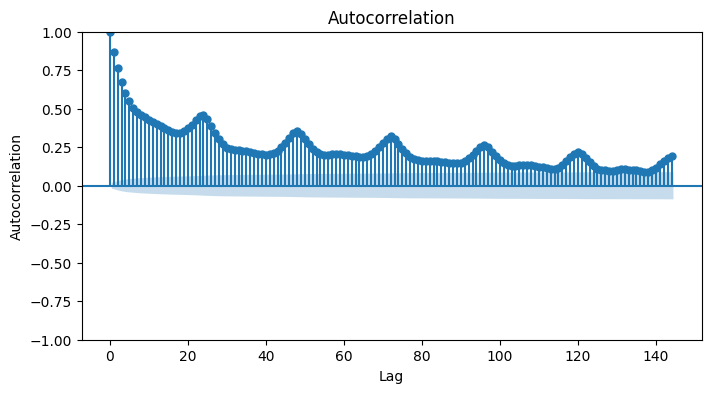

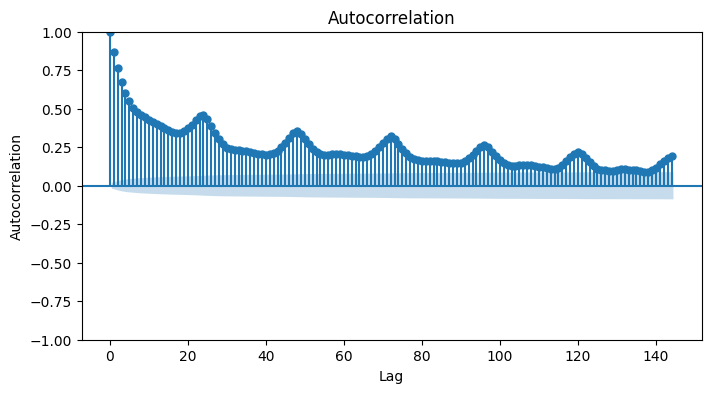

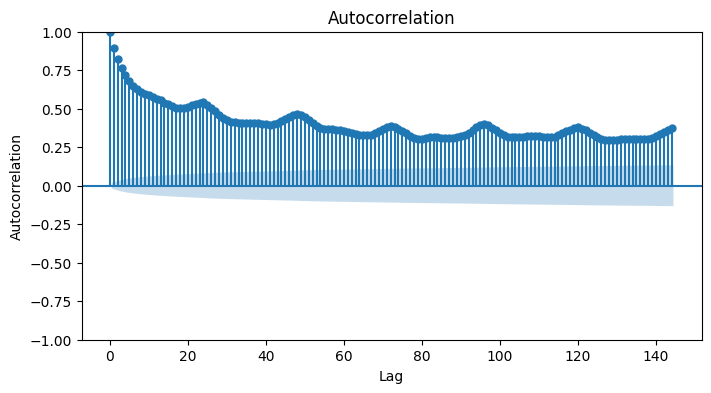

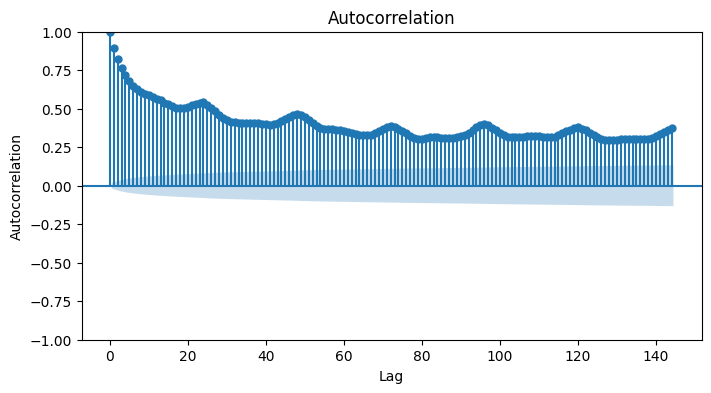

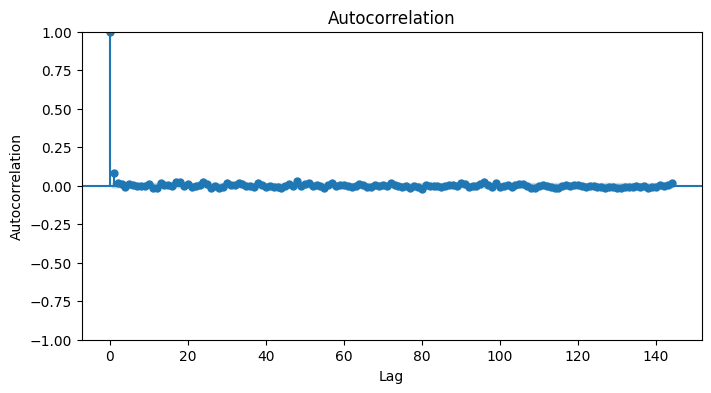

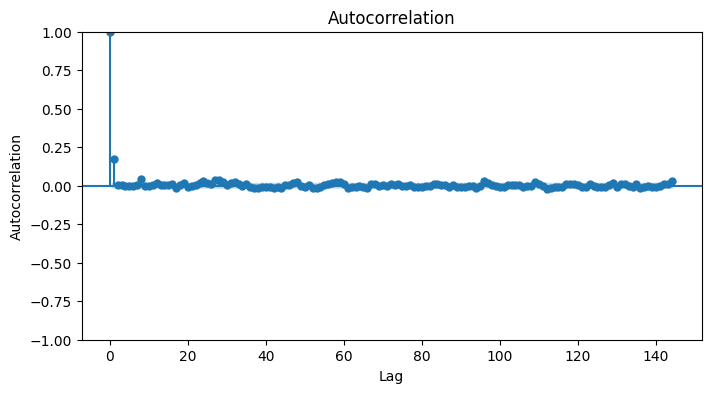

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

for parameter in data.columns:
    #print(parameter)

    # Assuming your time series data is stored in the variable 'data'
    fig, ax = plt.subplots(figsize=(8, 4))
    plot_acf(data[parameter], lags=24*6, ax=ax)  # Adjust 'lags' as per your requirement
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    #plt.title(parameter)
    plt.show()


In [51]:
data = data["Spot"]


In [52]:
data.shape
reshaped_df = pd.DataFrame(data.values.reshape((24, -1),order='F'))



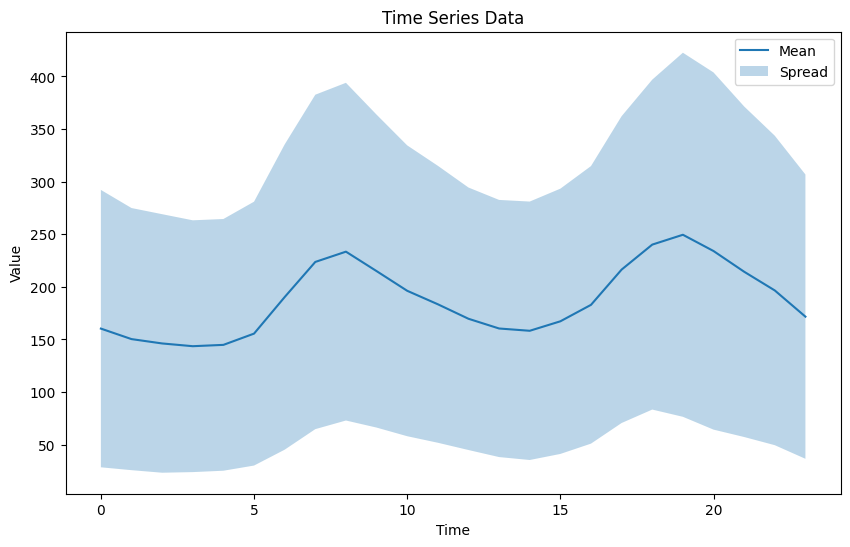

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated daily_avg and daily_std
daily_avg = np.mean(reshaped_df, axis=1)
daily_std = np.std(reshaped_df, axis=1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_avg, label='Mean')
plt.fill_between(range(len(daily_avg)), daily_avg - daily_std, daily_avg + daily_std, alpha=0.3, label='Spread')
plt.title("Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()


Descriptive Statistics:
count    10920.000000
mean       187.690899
std        143.870410
min         -0.100000
25%         84.400002
50%        158.514999
75%        252.432495
max        871.000000
Name: Spot, dtype: float64



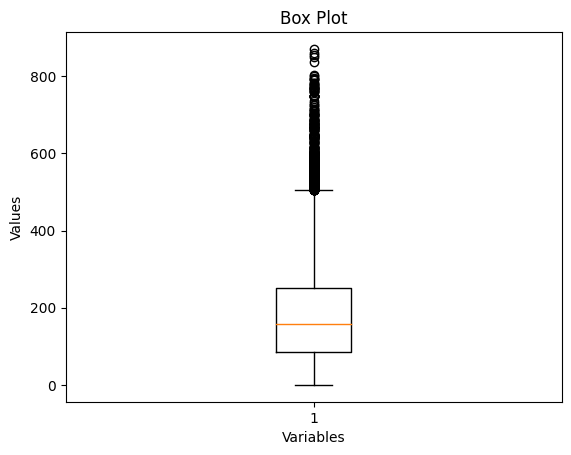

Data Visualization:


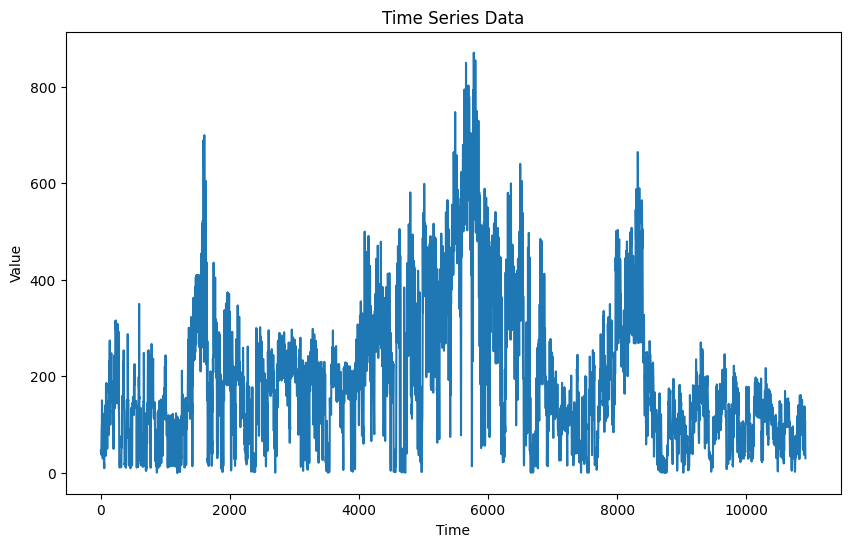


Autocorrelation Analysis:


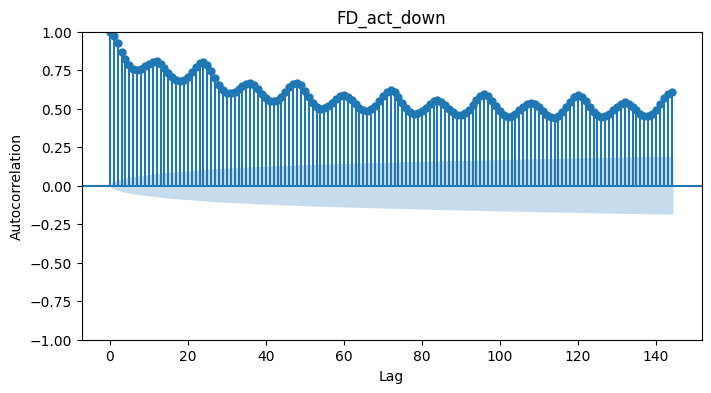

Outlier Detection:
Number of Outliers: 126

Time Series Decomposition using STL:


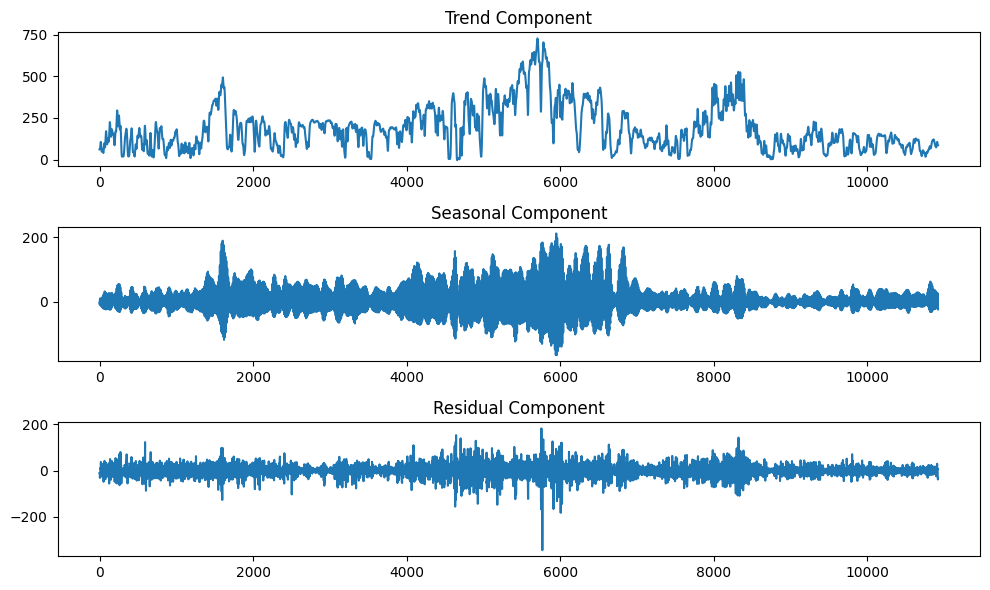

Data Distribution Analysis:


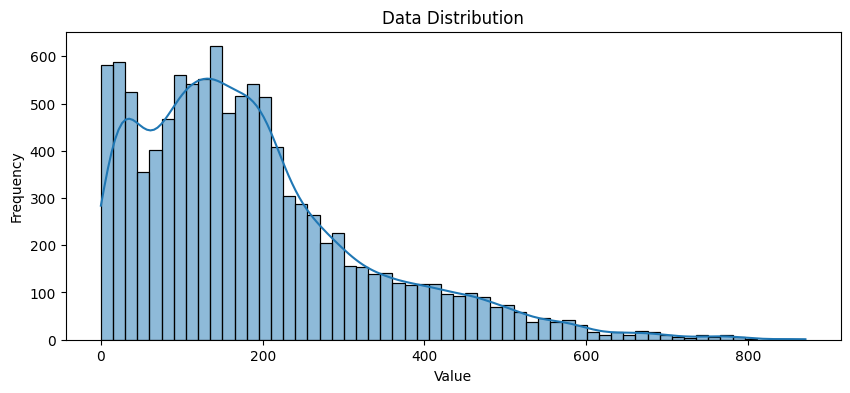

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in the variable 'data'
# Make sure it is in a pandas DataFrame or Series format

# 1. Descriptive statistics
print("Descriptive Statistics:")
print(data.describe())
print()

# Assuming you have a DataFrame named 'data'
plt.boxplot(data.values)
plt.title('Box Plot')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


# 2. Data visualization
print("Data Visualization:")
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
print()

# 3. Autocorrelation analysis
print("Autocorrelation Analysis:")

# Assuming your time series data is stored in the variable 'data'
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(data, lags=24*6, ax=ax)  # Adjust 'lags' as per your requirement
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title(parameter)
plt.show()

# 4. Outlier detection
print("Outlier Detection:")
outliers = np.abs((data - data.mean()) / data.std()) > 3
print("Number of Outliers:", outliers.sum())
print()

# Assuming your time series data is stored in the variable 'data'
# Make sure it is in a pandas DataFrame or Series format

# Specify the period based on the characteristics of your data
# For example, if you have monthly data, set period=12
period = 12

# 5. Time series decomposition using STL
print("Time Series Decomposition using STL:")
stl_decomposition = STL(data, period=period)
result = stl_decomposition.fit()
trend = result.trend
seasonal = result.seasonal
residual = result.resid
# Plot the decomposition components
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(trend)
plt.title("Trend Component")
plt.subplot(312)
plt.plot(seasonal)
plt.title("Seasonal Component")
plt.subplot(313)
plt.plot(residual)
plt.title("Residual Component")
plt.tight_layout()
plt.show()

# 6. Data distribution analysis
print("Data Distribution Analysis:")
plt.figure(figsize=(10, 4))
sns.histplot(data, kde=True)
plt.title("Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
print()


